In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style ('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


In [2]:
# Importing Dataset
data = pd.read_csv ('../input/top-hits-spotify-from-20002019/songs_normalize.csv')
data.head(2)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop"


In [3]:
# Converting Time from Miliseconds to Minutes

duration_to_minites = data['duration_ms']/60000

In [4]:
# Adding Minutes columns to the entire dataset
data['duration_minutes'] = duration_to_minites

data.head(2)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_minutes
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop,3.519333
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop",2.784433


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
data.describe(include='all')

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_minutes
count,2000,2000,2000.000000,2000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000
unique,835,1879,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN
top,Rihanna,Sorry,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop,NaN
freq,25,5,NaN,1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428,NaN
mean,NaN,NaN,228748.124500,NaN,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558,NaN,3.812469
std,NaN,NaN,39136.569008,NaN,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112,NaN,0.652276
min,NaN,NaN,113000.000000,NaN,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,NaN,1.883333
25%,NaN,NaN,203580.000000,NaN,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750,NaN,3.393000
50%,NaN,NaN,223279.500000,NaN,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500,NaN,3.721325
75%,NaN,NaN,248133.000000,NaN,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500,NaN,4.135550


In [7]:
# Checking Dataset for Null Values
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
duration_minutes    0
dtype: int64

<AxesSubplot:>

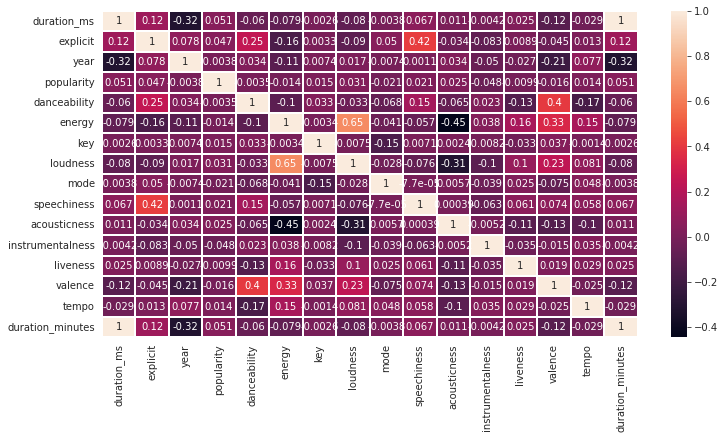

In [8]:
# Datasets Correlation
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, linewidth=2)

In [9]:
print('Total Artists =',data['artist'].nunique())
print('Total Songs =', data['song'].nunique())
print('Total Genre =',data['genre'].nunique())

Total Artists = 835
Total Songs = 1879
Total Genre = 59


In [10]:
# Maximum Popularity
data['popularity'].max()

89

In [11]:
data[data['popularity']==89]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_minutes
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop",4.006667


In [12]:
data.groupby (['popularity']).max().sort_values('popularity',ascending=False).head(5)

,artist,song,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_minutes
popularity,,,,,,,,,,,,,,,,,,
89,The Neighbourhood,Sweater Weather,240400,False,2013,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop",4.006667
88,Tom Odell,Another Love,244360,True,2013,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop,4.072667
87,Eminem,Without Me,290320,True,2002,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop,4.838667
86,WILLOW,lovely (with Khalid),284200,True,2018,0.949,0.705,5,-4.244,0,0.0572,0.93400,0.000019,0.0950,0.760,115.284,"pop, R&B, Dance/Electronic",4.736667
85,The Neighbourhood,The Nights,297786,True,2019,0.726,0.847,10,-3.237,1,0.1860,0.19200,0.149000,0.3090,0.867,171.447,"rock, pop",4.963100


In [13]:
data.groupby (['popularity','loudness','genre','duration_minutes','liveness']).max().sort_values('popularity',ascending=False).head(5)

artist  \
popularity loudness genre                      duration_minutes liveness                      
89         -2.810   rock, pop                  4.006667         0.1010    The Neighbourhood   
88         -8.532   pop                        4.072667         0.0944            Tom Odell   
87         -2.827   hip hop                    4.838667         0.2370               Eminem   
86         -4.244   hip hop                    4.736667         0.0454               Eminem   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943               WILLOW   

                                                                                         song  \
popularity loudness genre                      duration_minutes liveness                        
89         -2.810   rock, pop                  4.006667         0.1010        Sweater Weather   
88         -8.532   pop                        4.072667         0.0944           Another Love   
87         -2.827   hip hop                    4.838667         0.2370             Without Me   
86         -4.244   hip hop                    4.736667         0.0454    The Real Slim Shady   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943         Wait a Minute!   

                                                                          duration_ms  \
popularity loudness genre                      duration_minutes liveness                
89         -2.810   rock, pop                  4.006667         0.1010         240400   
88         -8.532   pop                        4.072667         0.0944         244360   
87         -2.827   hip hop                    4.838667         0.2370         290320   
86         -4.244   hip hop                    4.736667         0.0454         284200   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943         196520   

                                                                          explicit  \
popularity loudness genre                      duration_minutes liveness             
89         -2.810   rock, pop                  4.006667         0.1010       False   
88         -8.532   pop                        4.072667         0.0944        True   
87         -2.827   hip hop                    4.838667         0.2370        True   
86         -4.244   hip hop                    4.736667         0.0454        True   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943       False   

                                                                          year  \
popularity loudness genre                      duration_minutes liveness         
89         -2.810   rock, pop                  4.006667         0.1010    2013   
88         -8.532   pop                        4.072667         0.0944    2013   
87         -2.827   hip hop                    4.838667         0.2370    2002   
86         -4.244   hip hop                    4.736667         0.0454    2000   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943    2015   

                                                                          danceability  \
popularity loudness genre                      duration_minutes liveness                 
89         -2.810   rock, pop                  4.006667         0.1010           0.612   
88         -8.532   pop                        4.072667         0.0944           0.445   
87         -2.827   hip hop                    4.838667         0.2370           0.908   
86         -4.244   hip hop                    4.736667         0.0454           0.949   
           -5.279   pop, R&B, Dance/Electronic 3.275333         0.0943           0.764   

                                                                          energy  \
popularity loudness genre                      duration_minutes liveness           
89         -2.810   rock, pop                  4.006667         0.1010     0.807   
88         -8.532   pop                        4.07266

Explicit Is True = 551
Explicit Is False = 1449


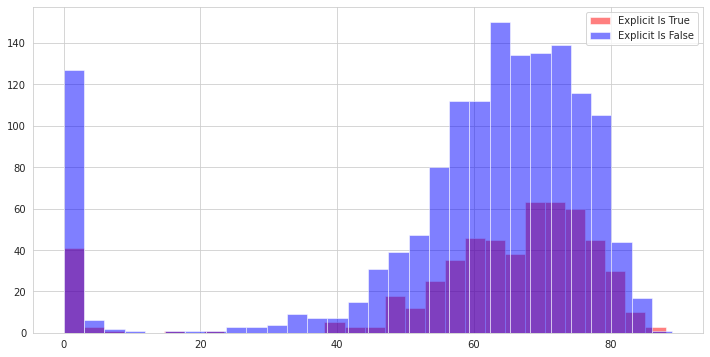

In [14]:
print ('Explicit Is True =',(data[data['explicit']==True]['popularity']).count())
print ('Explicit Is False =',(data[data['explicit']==False]['popularity']).count())
plt.figure(figsize=(12,6))
data[data['explicit']==True]['popularity'].hist(bins=30, color='red',alpha=0.5,
                                                        label='Explicit Is True')
data[data['explicit']==False]['popularity'].hist(bins=30, color='blue',alpha=0.5,
                                                        label='Explicit Is False')
plt.legend()

Text(0, 0.5, 'Popularity')

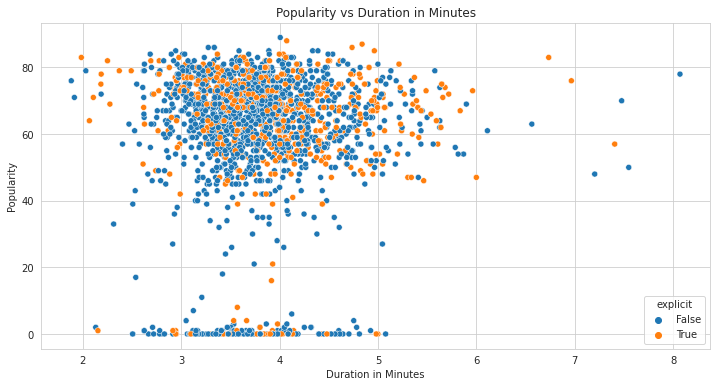

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot (x=data['duration_minutes'], y=data['popularity'],hue=data['explicit']) 
plt.title ('Popularity vs Duration in Minutes')
plt.xlabel ('Duration in Minutes')
plt.ylabel ('Popularity')

In [16]:
print ('Mode is Major =',(data[data['mode']==1]['popularity']).count())
print ('Mode is Minor =',(data[data['mode']==0]['popularity']).count())

Mode is Major = 1107
Mode is Minor = 893


Text(0.5, 1.0, 'Liveness VS polpularity')

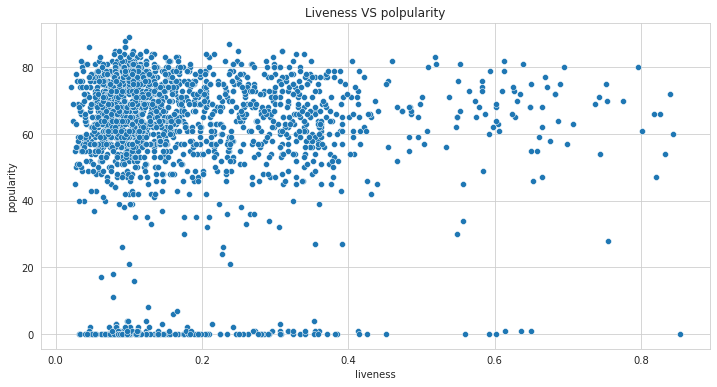

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot (x=data['liveness'], y=data['popularity'])
plt.title ('Liveness VS polpularity')

In [18]:
data.groupby (['year','popularity','artist','song','genre','liveness','duration_minutes']).max().sort_values('popularity',ascending=False).head(10)

duration_ms  \
year popularity artist            song                 genre                      liveness duration_minutes                
2013 89         The Neighbourhood Sweater Weather      rock, pop                  0.1010   4.006667               240400   
     88         Tom Odell         Another Love         pop                        0.0944   4.072667               244360   
2002 87         Eminem            Without Me           hip hop                    0.2370   4.838667               290320   
2015 86         WILLOW            Wait a Minute!       pop, R&B, Dance/Electronic 0.0943   3.275333               196520   
2018 86         Billie Eilish     lovely (with Khalid) pop, Dance/Electronic      0.0950   3.336417               200185   
2000 86         Eminem            The Real Slim Shady  hip hop                    0.0454   4.736667               284200   
2012 85         Bruno Mars        Locked out of Heaven pop                        0.3090   3.891300               233478   
2014 85         Avicii            The Nights           pop, Dance/Electronic      0.2490   2.944300               176658   
2002 85         Eminem            'Till I Collapse     hip hop                    0.0816   4.963100               297786   
2019 85         Post Malone       Circles              hip hop                    0.0863   3.588000               215280   

                                                                                                             explicit  \
year popularity artist            song                 genre                      liveness duration_minutes             
2013 89         The Neighbourhood Sweater Weather      rock, pop                  0.1010   4.006667             False   
     88         Tom Odell         Another Love         pop                        0.0944   4.072667              True   
2002 87         Eminem            Without Me           hip hop                    0.2370   4.838667              True   
2015 86         WILLOW            Wait a Minute!       pop, R&B, Dance/Electronic 0.0943   3.275333             False   
2018 86         Billie Eilish     lovely (with Khalid) pop, Dance/Electronic      0.0950   3.336417             False   
2000 86         Eminem            The Real Slim Shady  hip hop                    0.0454   4.736667              True   
2012 85         Bruno Mars        Locked out of Heaven pop                        0.3090   3.891300             False   
2014 85         Avicii            The Nights           pop, Dance/Electronic      0.2490   2.944300             False   
2002 85         Eminem            'Till I Collapse     hip hop                    0.0816   4.963100              True   
2019 85         Post Malone       Circles              hip hop                    0.0863   3.588000             False   

                                                                                                             danceability  \
year popularity artist            song                 genre                      liveness duration_minutes                 
2013 89         The Neighbourhood Sweater Weather      rock, pop                  0.1010   4.006667                 0.612   
     88         Tom Odell         Another Love         pop                        0.0944   4.072667                 0.445   
2002 87         Eminem            Without Me           hip hop                    0.2370   4.838667                 0.908   
2015 86         WILLOW            Wait a Minute!       pop, R&B, Dance/Electronic 0.0943   3.275333                 0.764   
2018 86         Billie Eilish     lovely (with Khalid) pop, Dance/Electronic      0.0950   3.336417                 0.351   
2000 86         Eminem            The Real Slim Shady  hip hop                    0.0454   4.736667                 0.949   
2012 85         Bruno Mars        Locked out of Heaven pop                        0.3090   3.891300                 0.726   
2014 85         Avicii            The Nigh

**Conclusion**

From this analysis, it is clear that the popular songs have a feel of **'POP'** as its common genre with duration in Minutes less than **5-Minutes** and the songs that are most popular are recorded in the studio **(Liveness < 1)** which implies that listeners prefer songs recorded in the **studio** to the songs performed live.

In general, songs which **do not contain lyrics/contents offensive to children** tends to be more popular.
[Explicit Is True = 551
Explicit Is False = 1449].

To make a hit track/album, New artsts should have a feel/blend of **POP** in their songs/videos, record in the **studio**,as much as they can make **lyrics/video contents suitable for children** and also **avoid tracks with duration above 5-Minutes**.